In [3]:
import pandas as pd
import numpy as np

### *PD data filtering*

In [4]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [5]:
students_performance.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
students_performance.shape

(1000, 8)

#### *pandas index location*

In [9]:
students_performance.iloc[[0,3,4,7,8], 3:5]

,lunch,test preparation course
0,standard,none
3,free/reduced,none
4,standard,none
7,free/reduced,none
8,free/reduced,completed


In [10]:
students_performance_with_name = students_performance.iloc[[0,3,4,7,8]]

In [11]:
students_performance_with_name.index = ['Cersei', 'Tywin', 'Gregor', 'Jeoffrey', 'Payne']

In [12]:
students_performance_with_name

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Jeoffrey,male,group B,some college,free/reduced,none,40,43,39
Payne,male,group D,high school,free/reduced,completed,64,64,67


In [13]:
students_performance_with_name.loc[['Cersei', 'Jeoffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Jeoffrey,male,39


#### *pd.Series*, 1-dim named array (vector) - base elemement of pandas DF.

In [14]:
type(students_performance_with_name.iloc[:,0])

pandas.core.series.Series

In [15]:
pd.Series([1,2,3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [16]:
students_performance_with_name['gender']

Cersei      female
Tywin         male
Gregor        male
Jeoffrey      male
Payne         male
Name: gender, dtype: object

In [17]:
students_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [18]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [19]:
titanic.shape

(891, 12)

In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
students_performance.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [22]:
students_performance.loc[students_performance.gender == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [23]:
mean_ws = students_performance['writing score'].mean()

In [24]:
students_performance.loc[students_performance['writing score'] > mean_ws]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [25]:
students_performance.loc[(students_performance['writing score'] > 50) & (students_performance.gender == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
students_performance[(students_performance['lunch'] == 'free/reduced')].shape[0]/students_performance.shape[0]

0.355

In [27]:
students_performance[(students_performance['lunch'] == 'free/reduced')].iloc[:, 5:8].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [28]:
students_performance[(students_performance['lunch'] == 'standard')].iloc[:, 5:8].describe()


,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [29]:
students_performance = students_performance \
    .rename(columns = 
            {'parental level of education' : 'parental_level_of_education',
             'test preparation course' : 'test_preparation_course',
             'math score' : 'math_score',
             'reading score' : 'reading_score',
             'writing score' : 'writing_score'})

#### Query method

In [30]:
students_performance.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [31]:
writing_score_threshold = 78
students_performance.query("writing_score > @writing_score_threshold")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [32]:
score_columns = [i for i in list(students_performance) if 'score' in i]
students_performance[score_columns]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


SQL-like filter in pandas. Axis is rows/columns, passed methods include also regex, like & items

In [33]:
students_performance.filter(like='score', axis = 1)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### *PD DATA GROUPING & AGGREGATION*

In [34]:
students_performance.groupby('gender', as_index = False) \
                    .aggregate({'math_score' : 'mean', 'reading_score' : 'mean'})

,gender,math_score,reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [35]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
                    .aggregate({'math_score' : 'mean', 'reading_score' : 'mean'}) \
                    .rename(columns = {'math_score' : 'mean_ms', 'reading_score' : 'mean_rs'})

Pandas multi-level indices

In [36]:
mean_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [37]:
mean_scores.loc[[('female', 'group A')]]

,,mean_ms,mean_rs
gender,race/ethnicity,,
female,group A,58.527778,69.0


In [38]:
students_performance.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

#### Sorting

In [39]:
students_performance.sort_values(['gender', 'math_score'], ascending = False).groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


#### Creating new column

In [40]:
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score \
                                        + students_performance.writing_score

In [41]:
students_performance.sort_values('total_score', ascending = False).head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


In [42]:
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))

In [43]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [44]:
students_performance.drop(['total_score'], axis = 1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,5.273000
998,female,group D,some college,standard,completed,68,78,77,5.407172


### DATA VIS: MATPLOTLIB, SEABORN, BUILT-IN matplotlib in PANDAS

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

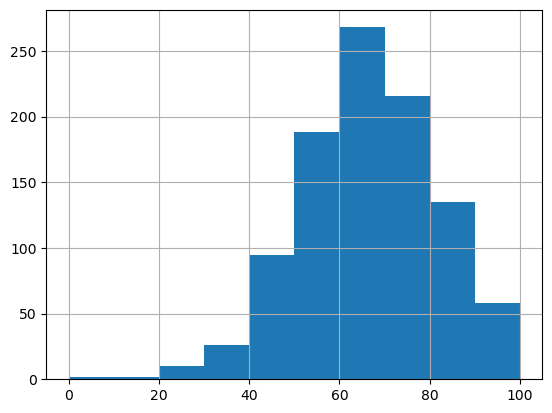

In [46]:
students_performance.math_score.hist()

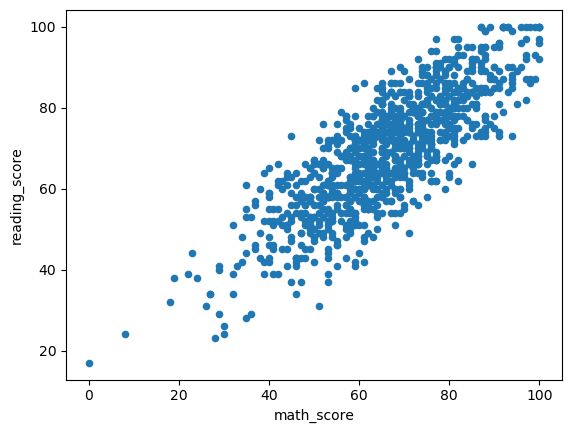

In [47]:
students_performance.plot.scatter(x = 'math_score', y = 'reading_score')

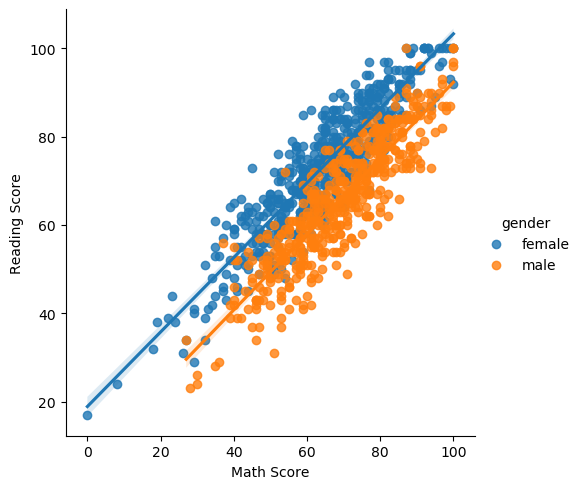

In [48]:
fsns = sns.lmplot(x = 'math_score', y = 'reading_score', hue = 'gender', data=students_performance)
fsns.set_xlabels('Math Score')
fsns.set_ylabels('Reading Score')

## *Homeworks Unit 1*

In [49]:
herostats_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [50]:
herostats_dota.head(15)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
5,5,Ranged,6,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']"
6,6,Melee,7,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']"
7,7,Melee,8,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']"
8,8,Ranged,9,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab..."
9,9,Ranged,10,0,Morphling,npc_dota_hero_morphling,agi,"['Carry', 'Escape', 'Durable', 'Nuker', 'Disab..."


In [51]:
herostats_dota.loc[herostats_dota.legs == 8].shape

(1, 8)

In [52]:
herostats_dota.groupby(['attack_type', 'primary_attr']).aggregate({'id' : 'count'})

id
attack_type primary_attr    
Melee       agi           19
            int            2
            str           35
Ranged      agi           18
            int           40
            str            3

In [53]:
herostats_dota[['localized_name','roles']]

,localized_name,roles
0,Anti-Mage,"['Carry', 'Escape', 'Nuker']"
1,Axe,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Bane,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Bloodseeker,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Crystal Maiden,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...
112,Monkey King,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,Dark Willow,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,Pangolier,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,Grimstroke,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [54]:
import ast

In [55]:
herostats_dota['lenroles'] = herostats_dota.roles.transform(ast.literal_eval).str.len()

In [56]:
herostats_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,lenroles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dce6997c0>]],
      dtype=object)

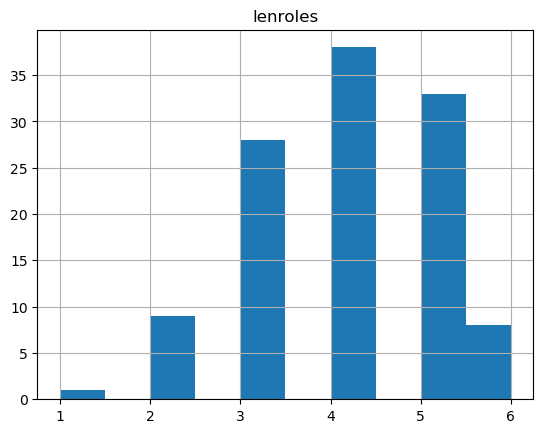

In [57]:
herostats_dota[['localized_name', 'lenroles']].hist()

In [58]:
accountancy = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [59]:
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [60]:
mean_salary = accountancy.groupby(['Executor', 'Type']).aggregate({'Salary': 'mean'})

In [61]:
mean_salary

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [62]:
mean_salary.loc['Loopa'] > mean_salary.loc['Pupa']

,Salary
Type,
A,False
B,True
C,True
D,False
E,True
F,True


In [63]:
algae = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [65]:
algae.groupby('genus').aggregate('mean', numeric_only = True)

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [66]:
round(algae[['alanin']][algae.genus == 'Fucus'].describe(), 2)

,alanin
count,3.00
mean,3.57
std,3.15
min,0.35
25%,2.03
50%,3.71
75%,5.18
max,6.64


In [67]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [68]:
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


#### These will get the same result: basic lineplot

In [69]:
#df.income.plot()
#sns.lineplot(data = df)
#plt.plot(df.index, df.income)
#sns.lineplot(x=df.index, y=df.income)
#df['income'].plot()
#df.plot()
#df.plot(kind='line')

In [70]:
df = pd.read_table('df.txt', sep= ' ')

In [71]:
df.head()

,x,y
0,514.244380,98.780050
1,300.689637,601.572488
2,1191.103598,897.781057
3,998.670865,1498.884680
4,1187.178916,907.248136


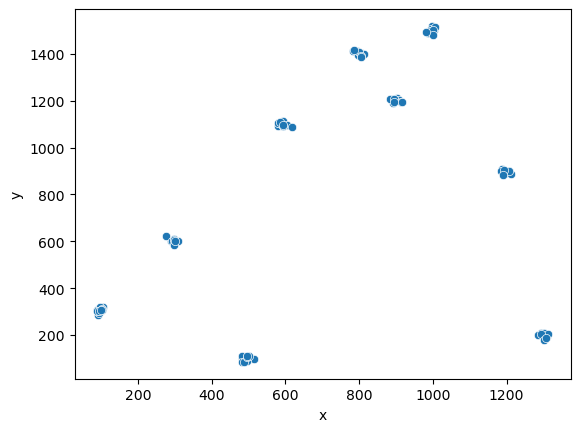

In [72]:
sns.scatterplot(data = df, x = 'x', y = 'y')

In [73]:
heatplotdata = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', sep = ',')

In [74]:
heatplotdata.iloc[:,1:]

,species0,species1,species2,species3,species4
0,0.536029,0.920292,0.679708,0.840606,0.430842
1,0.920292,0.862417,0.887593,0.769754,0.203214
2,0.679708,0.887593,0.595156,0.003435,0.096052
3,0.840606,0.769754,0.003435,0.458870,0.029251
4,0.430842,0.203214,0.096052,0.029251,0.642109


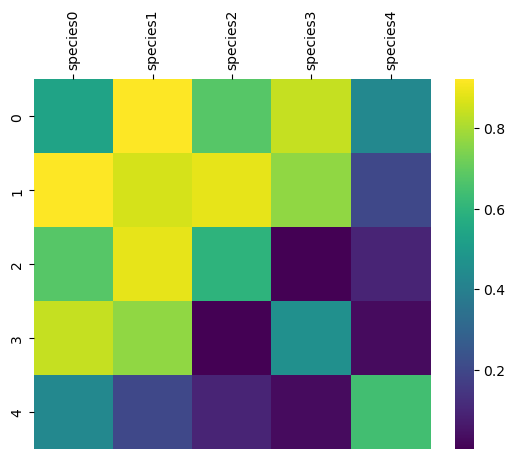

In [75]:
g = sns.heatmap(data = heatplotdata.iloc[:,1:], cmap = 'viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [76]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', sep = ',')

In [77]:
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [78]:
iris = iris.drop('Unnamed: 0', axis = 1)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


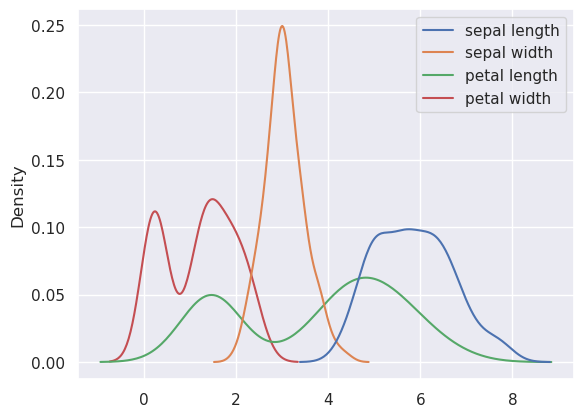

In [79]:
sns.set_theme()
sns.kdeplot(data = iris.iloc[:,:-1])

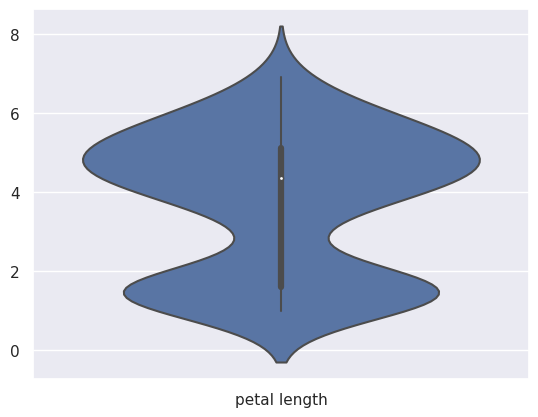

In [80]:
sns.violinplot(data=iris.filter(like='petal length', axis = 1))

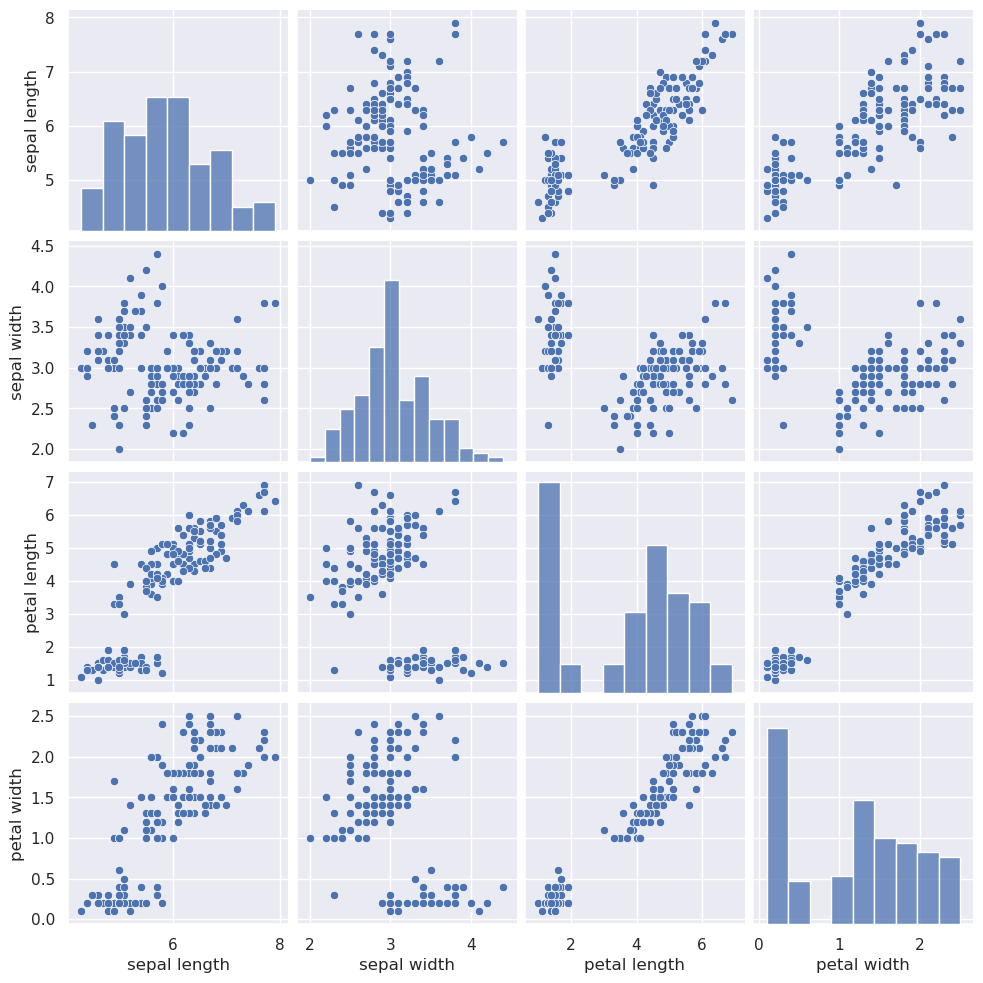

In [81]:
sns.pairplot(data=iris.iloc[:,:-1])

In [264]:
df = pd.DataFrame({'type' : ['A','A','B','B'], 'value' : [10,14,12,23]})

In [88]:
my_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [89]:
my_data.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [103]:
my_data.iloc[:10, [0,2]]

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [102]:
my_data.iloc[:, [1,3]].drop([0,4])

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [129]:
my_data[(my_data['V1'] > 0) & (my_data['V3'] == 'A')] # same as the following:

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [127]:
my_data.query("V1 > 0 & V3 == 'A'")

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [133]:
my_data.query("V2 != 10 | V4 >= 1")

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [132]:
my_data[(my_data['V2'] != 10) | (my_data['V4'] >= 1)] 

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [140]:
my_data.assign(V5 = my_data.V1 + my_data.V4, V6 = np.log(my_data.V2))

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


In [145]:
my_data = my_data.rename(columns={
    'V1': 'session_value',
    'V2': 'group',
    'V3': 'time',
    'V4': 'n_users'
    }
)

In [255]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [252]:
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [253]:
my_stat.iloc[np.where(my_stat.isna())] = 0
my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat.n_users[my_stat.n_users >= 0].median()

In [244]:
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [256]:
my_stat.loc[my_stat.n_users < 0, 'n_users'] 

1    -1
8   -11
9   -20
Name: n_users, dtype: int64

In [263]:
my_stat.groupby('group', as_index = False).agg \
        ({'session_value': 'count'}).rename(columns={'session_value': 'mean_session_value'})

,group,mean_session_value
0,A,4
1,B,4


### 1.11 - pandas practice / contest

In [284]:
events_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [285]:
submissions_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [272]:
events_train.dtypes

step_id       int64
timestamp     int64
action       object
user_id       int64
dtype: object

In [287]:
events_train.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [302]:
events_train['date'] = pd.to_datetime(events_train.timestamp, unit = 's')
submissions_train['date'] = pd.to_datetime(events_train.timestamp, unit = 's')

In [277]:
events_train.tail()

,step_id,timestamp,action,user_id
3480698,33375,2018-05-19 23:31:25,viewed,11677
3480699,32815,2018-05-19 23:32:30,viewed,5198
3480700,32815,2018-05-19 23:32:30,discovered,5198
3480701,32815,2018-05-19 23:32:30,passed,5198
3480702,33892,2018-05-19 23:33:31,viewed,18526


In [288]:
submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit = 's')

In [289]:
submissions_train.sort_values('timestamp', ascending = False).head()

,step_id,timestamp,submission_status,user_id,date
484824,32244,1526771227,correct,19410,2018-05-19 23:07:07
484812,32089,1526770204,correct,19410,2018-05-19 22:50:04
484803,31986,1526770164,correct,19410,2018-05-19 22:49:24
484804,31988,1526769991,correct,19410,2018-05-19 22:46:31
484798,31981,1526769714,correct,19410,2018-05-19 22:41:54


In [283]:
events_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [290]:
events_train.date.min()

Timestamp('2015-06-15 04:00:48')

In [291]:
events_train.date.max()

Timestamp('2018-05-19 23:33:31')

In [303]:
events_train['day'] = events_train.date.dt.date
submissions_train['day'] = submissions_train.date.dt.date

In [304]:
submissions_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [296]:
events_train.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

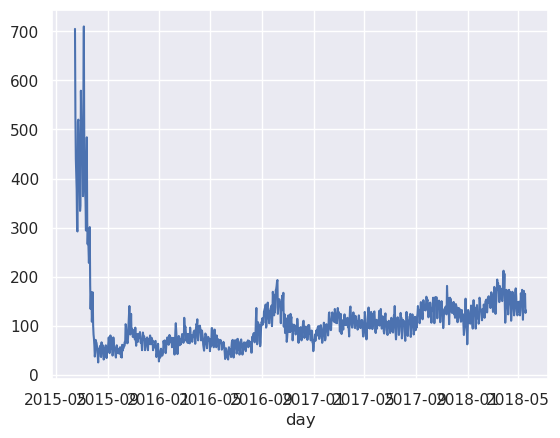

In [295]:
events_train.groupby('day').user_id.nunique().plot()

In [341]:
events_train.pivot_table(index='user_id',
                         columns='action',
                         values='step_id',
                         aggfunc='count',
                         fill_value=0).reset_index().sort_values('viewed', ascending = False)

action,user_id,discovered,passed,started_attempt,viewed
15007,20907,163,102,0,32778
7780,10794,198,122,27,16089
18150,25279,198,122,166,9693
781,1046,128,124,721,8122
2611,3572,194,193,550,6968
...,...,...,...,...,...
13536,18842,0,1,1,0
6334,8773,0,0,1,0
9486,13181,0,0,7,0
2212,3025,0,0,2,0


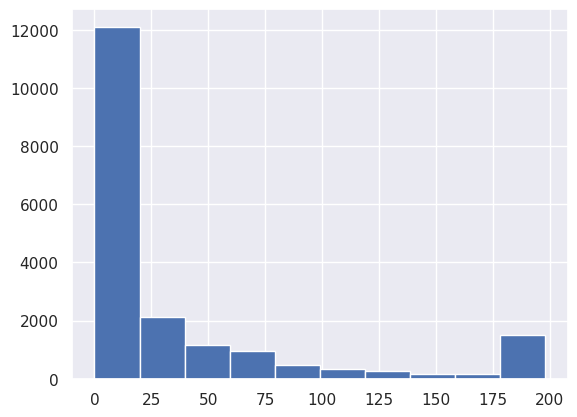

In [301]:
events_train.pivot_table(index='user_id',
                         columns='action',
                         values='step_id',
                         aggfunc='count',
                         fill_value=0).reset_index().discovered.hist()

In [305]:
submissions_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [337]:
submissions_train.pivot_table(index='user_id',
                         columns='submission_status',
                         values='step_id',
                         aggfunc='count',
                         fill_value=0).reset_index().sort_values('correct', ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


Calculate gaps (breaks) in user activity:

In [319]:
gap_data = events_train[['user_id', 'day', 'timestamp']].drop_duplicates(subset = \
                                                                      ['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list)

In [320]:
gap_data = gap_data.apply(np.diff).values

In [321]:
gap_data = np.concatenate(gap_data, axis = 0)

In [323]:
gap_data = pd.Series(gap_data)

In [330]:
gap_data = gap_data / (3600*24)

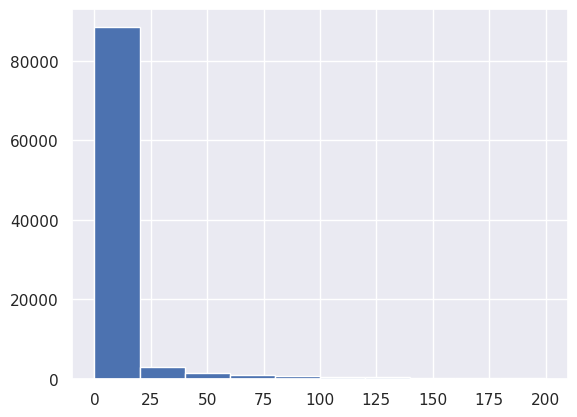

In [332]:
gap_data[gap_data < 200].hist()

In [333]:
gap_data.quantile(0.90)

18.325995370370403

18 days would be an estimation to consider whether user may still be active or it's a churn.